**TASK-1** = MOVIE RATING PREDICTION

**BATCH** : AUGUST - 2023

**DOMAIN** : DATA SCIENCE

**Aim** : Build a model that predicts the rating of a movie based on features like genre,director and actor.

**Name** : Dimpal Singh

**GitHub Link**
https://github.com/dimpal-singh/CODSOFT_TASKS.git

#Problem statement

In today's entertainment landscape, where movies are produced and distributed across various platforms, predicting the success of a movie is a critical challenge. Movie ratings play a crucial role in the decision-making processes of movie studios, streaming services, and moviegoers. Accurate movie rating predictions can help stakeholders identify potential blockbusters, optimize marketing strategies, and improve user recommendations.

IMPORTING IMPORTANT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DOWNLOADING DATASETS

**MOVIE_DATA**

In [4]:
column_names = ["MovieIDs", "MovieName", "Genres"]
df_movie = pd.read_csv('/content/movies.dat', sep="::", engine='python', encoding='latin1', names=column_names)
df_movie.dropna(inplace=True)
df_movie.head()


,MovieIDs,MovieName,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_movie.dropna()

,MovieIDs,MovieName,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [6]:
df_movie.head()

,MovieIDs,MovieName,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_movie.shape

(3883, 3)

In [8]:
df_movie.describe()

,MovieIDs
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [9]:
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Genres       0
dtype: int64

DOWNLOADING DATASETS

**RATING DATA**

In [12]:
column_names = ["UserId", "MovieID", "Ratings","Timestamp"]
df_ratings = pd.read_csv('/content/ratings.dat.zip', sep="::", engine='python', encoding='latin1', names=column_names)
df_ratings.dropna(inplace=True)
df_ratings.head(10)


,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [13]:
df_ratings.head(10)

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [14]:
df_ratings.shape

(1000209, 4)

In [15]:
df_ratings.describe()

,UserId,MovieID,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [16]:
df_ratings.isna().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

DOWNLOADING DATASETS

**Users_data**

In [17]:
column_names = ["UserId", "Gender", "Age","Occupation","Zip-code"]
df_users = pd.read_csv('/content/users.dat', sep="::", engine='python', encoding='latin1', names=column_names)
df_ratings.dropna(inplace=True)
df_ratings.head(10)


,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [18]:
df_users.shape

(6040, 5)

In [19]:
df_users.describe()

,UserId,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_users['Gender']= labelencoder.fit_transform(df_users['Gender'])

df_users.head()


,UserId,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [21]:
df_users.isna().sum()


UserId        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

***CONCATENATING THE DATASETS**

In [22]:
df_data=pd.concat([df_movie,df_ratings,df_users],axis=1)
df_data.dropna()
df_data.head(10)

,MovieIDs,MovieName,Genres,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
5,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
6,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,1.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,0.0,35.0,1.0,95370


In [23]:
df_data.shape

(1000209, 12)

*REMOVING UNNECESSARY COLUMNS*



In [24]:
df2=df_data.drop(["Occupation","Zip-code",],axis=1)
df2.head()

,MovieIDs,MovieName,Genres,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0


In [25]:
df2.describe()

,MovieIDs,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age
count,3883.000000,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,6040.000000,6040.000000,6040.000000
mean,1986.049446,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,3020.500000,0.717053,30.639238
std,1146.778349,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.742145,0.450468,12.895962
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000,0.000000,1.000000
25%,982.500000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1510.750000,0.000000,25.000000
50%,2010.000000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3020.500000,1.000000,25.000000
75%,2980.500000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.250000,1.000000,35.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6040.000000,1.000000,56.000000


In [26]:
df2.isna().sum()

MovieIDs     996326
MovieName    996326
Genres       996326
UserId            0
MovieID           0
Ratings           0
Timestamp         0
UserId       994169
Gender       994169
Age          994169
dtype: int64

*handling missing values*

In [27]:
df_final=df2.dropna()

In [28]:
df_final=df2.dropna()

In [29]:
df_final.shape

(3883, 10)

<Axes: xlabel='Gender', ylabel='count'>

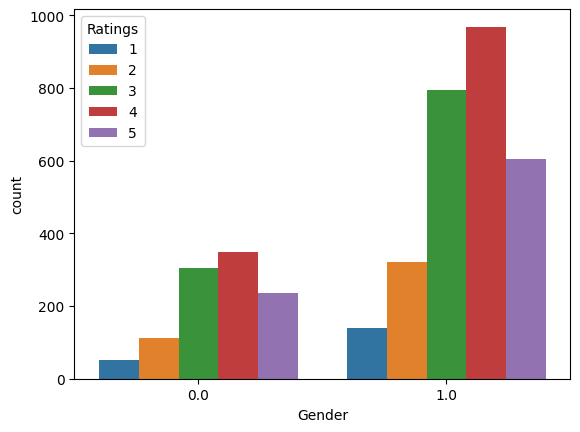

In [30]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

Text(0, 0.5, 'Ratings')

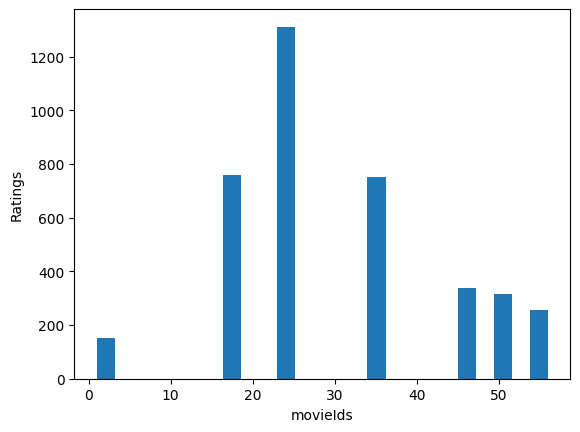

In [38]:
df_final.Age.plot.hist(bins=25)
plt.xlabel("movieIds")
plt.ylabel("Ratings")

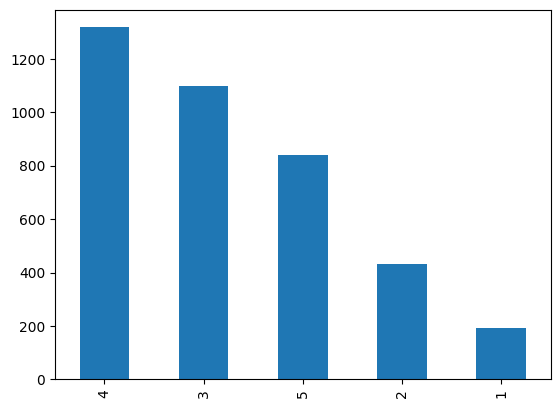

In [35]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

Text(0, 0.5, 'Ratings')

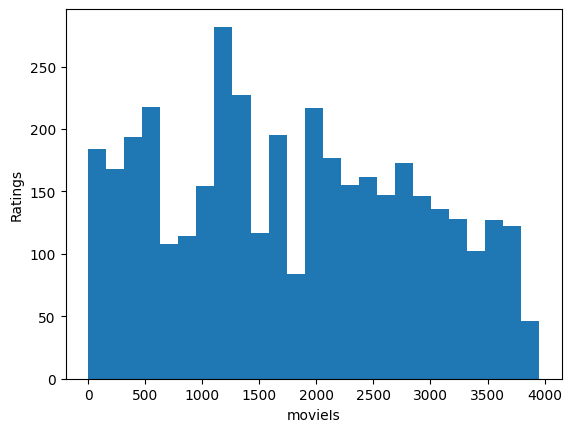

In [41]:
df_final['MovieID'].plot.hist(bins=25)
plt.xlabel("movieIs")
plt.ylabel('Ratings')

<Axes: ylabel='Frequency'>

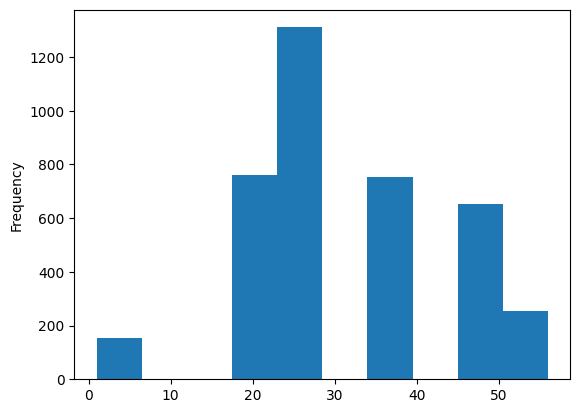

In [42]:
df_final['Age'].plot.hist(bins=10)


<Axes: xlabel='Age', ylabel='count'>

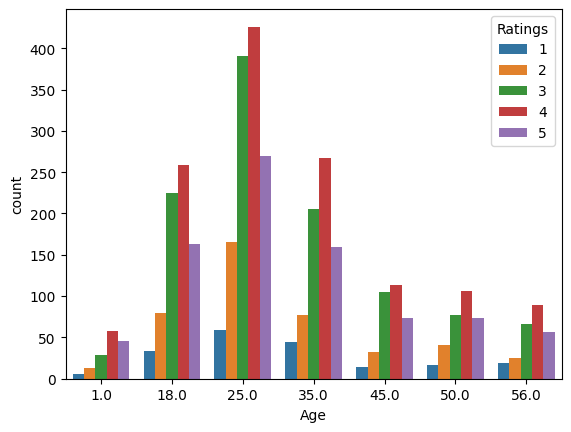

In [43]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])


**FINAL DATASET**

In [44]:
df_final.head()

,MovieIDs,MovieName,Genres,UserId,MovieID,Ratings,Timestamp,UserId,Gender,Age
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,0.0,1.0
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0


In [50]:
input=df_final.drop(['Ratings','MovieName','Genres','MovieIDs'], axis=1)
target=df_final['Ratings']

In [51]:
target.head()

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

In [52]:
input.head()

,UserId,MovieID,Timestamp,UserId,Gender,Age
0,1,1193,978300760,1.0,0.0,1.0
1,1,661,978302109,2.0,1.0,56.0
2,1,914,978301968,3.0,1.0,25.0
3,1,3408,978300275,4.0,1.0,45.0
4,1,2355,978824291,5.0,1.0,25.0


**TRAINING THE MODEL USING LOGISTIC REGRESSION**

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)
scaled_df.head()

,UserId,MovieID,Timestamp,UserId,Gender,Age
0,0.0,0.301696,0.005566,0.000000,0.0,0.000000
1,0.0,0.167046,0.005609,0.000258,1.0,1.000000
2,0.0,0.231081,0.005604,0.000515,1.0,0.436364
3,0.0,0.862313,0.005550,0.000773,1.0,0.800000
4,0.0,0.595799,0.022163,0.001030,1.0,0.436364


In [54]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)


In [55]:
print(Y_train)

2420    5
2435    4
2235    1
1537    3
2134    1
       ..
856     5
565     3
1662    3
2768    3
457     5
Name: Ratings, Length: 2718, dtype: int64


In [57]:
print(Y_test)

3306    4
1281    3
1442    3
575     2
403     4
       ..
3497    2
299     4
3217    5
1543    3
722     3
Name: Ratings, Length: 1165, dtype: int64


In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [59]:
X_test = np.array(X_test)

**MODEL PREDICTION**

In [60]:
model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 4, 4, ..., 4, 4, 4])

## thank you